In [277]:
import DeepMIMO
import numpy as np

# Channel generation
DeepMIMO_params = DeepMIMO.default_params() # Load the default parameters
DeepMIMO_params['dataset_folder'] = r'DeepMIMO/ray_tracing' # Path to the downloaded scenarios
DeepMIMO_params['scenario'] = 'O1_60' # DeepMIMO scenario
DeepMIMO_params['num_paths'] = 10 # Maximum number of paths
DeepMIMO_params['active_BS'] = np.array([6]) # Basestation indices to be included in the dataset

# Selected rows of users, whose channels are to be generated.
DeepMIMO_params['user_row_first'] = 400 # First user row to be included in the dataset
DeepMIMO_params['user_row_last'] = 450 # Last user row to be included in the dataset

# Configuration of the antenna arrays
DeepMIMO_params['bs_antenna']['shape'] = np.array([16, 1, 1]) # BS antenna shape through [x, y, z] axes
DeepMIMO_params['ue_antenna']['shape'] = np.array([1, 1, 1]) # UE antenna shape through [x, y, z] axes

# The OFDM_channels parameter allows choosing between the generation of channel impulse
# responses (if set to 0) or frequency domain channels (if set to 1).
# It is set to 0 for this simulation, as the channel responses in frequency domain
# will be generated using Sionna.
DeepMIMO_params['OFDM_channels'] = 0

dataset = DeepMIMO.generate_data(DeepMIMO_params)


Basestation 6

UE-BS Channels


Generating channels: 100%|██████████| 9231/9231 [00:00<00:00, 16647.51it/s]



BS-BS Channels


Generating channels: 100%|██████████| 1/1 [00:00<00:00, 2000.14it/s]


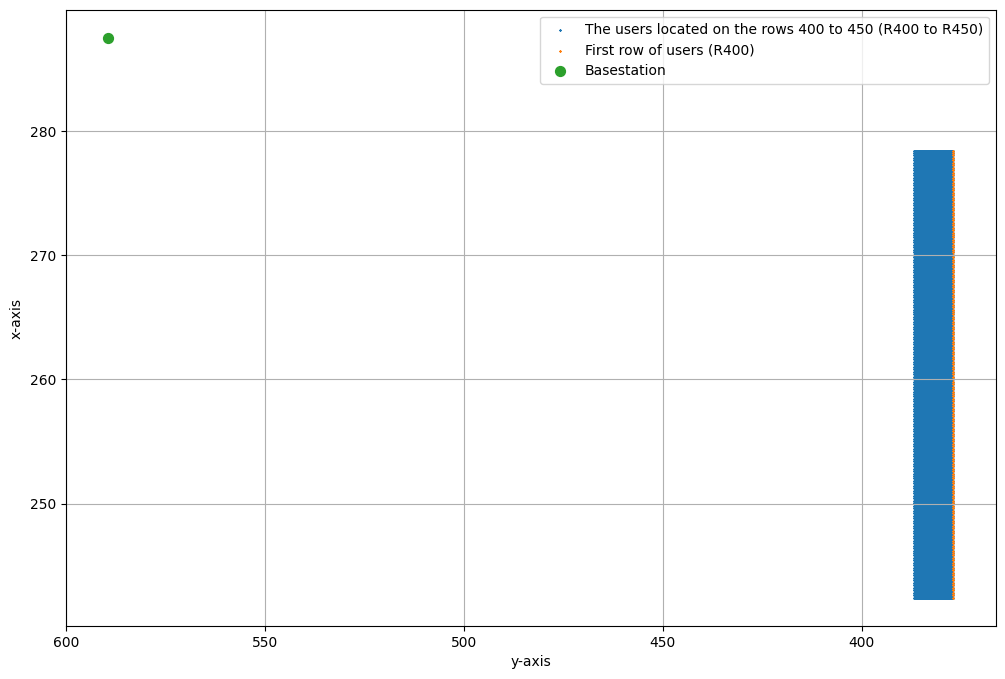

In [278]:
import matplotlib.pyplot as plt
import numpy as np
import pickle
import time
import os

plt.figure(figsize=(12,8))

## User locations
active_bs_idx = 0 # Select the first active basestation in the dataset
plt.scatter(dataset[active_bs_idx]['user']['location'][:, 1], # y-axis location of the users
         dataset[active_bs_idx]['user']['location'][:, 0], # x-axis location of the users
         s=1, marker='x', c='C0', label='The users located on the rows %i to %i (R%i to R%i)'%
           (DeepMIMO_params['user_row_first'], DeepMIMO_params['user_row_last'],
           DeepMIMO_params['user_row_first'], DeepMIMO_params['user_row_last']))
# First 181 users correspond to the first row

plt.scatter(dataset[active_bs_idx]['user']['location'][0:181, 1],
         dataset[active_bs_idx]['user']['location'][0:181, 0],
         s=1, marker='x', c='C1', label='First row of users (R%i)'% (DeepMIMO_params['user_row_first']))

## Basestation location
plt.scatter(dataset[active_bs_idx]['location'][1],
         dataset[active_bs_idx]['location'][0],
         s=50.0, marker='o', c='C2', label='Basestation')

plt.gca().invert_xaxis() # Invert the x-axis to align the figure with the figure above
plt.ylabel('x-axis')
plt.xlabel('y-axis')
plt.grid()
plt.legend()

In [279]:
dataset[0].keys()

dict_keys(['user', 'basestation', 'location'])

In [280]:
dataset[0]['user'].keys()

dict_keys(['paths', 'LoS', 'location', 'distance', 'pathloss', 'channel'])

In [281]:
dataset[0]['user']['paths'][0].keys()

dict_keys(['num_paths', 'DoD_phi', 'DoD_theta', 'DoA_phi', 'DoA_theta', 'phase', 'ToA', 'power'])

In [282]:
dataset[0]['user']['paths'][0]

{'num_paths': 7,
 'DoD_phi': array([-101.976 , -101.976 , -107.976 ,  -75.0812,  -75.0812, -107.976 ,
        -129.004 ], dtype=float32),
 'DoD_theta': array([91.0548, 91.8981, 91.026 , 91.0419, 91.8749, 92.0514, 90.8414],
       dtype=float32),
 'DoA_phi': array([ 78.0243,  78.0243, 107.529 ,  75.0812,  75.0812, 107.529 ,
         51.4429], dtype=float32),
 'DoA_theta': array([88.9452, 91.8981, 88.974 , 88.9581, 91.8749, 92.0514, 89.1586],
       dtype=float32),
 'phase': array([  79.5642,   77.1619, -134.868 ,   70.4298,  140.655 , -136.435 ,
         -92.5008], dtype=float32),
 'ToA': array([7.25063e-07, 7.25338e-07, 7.45348e-07, 7.34022e-07, 7.34294e-07,
        7.45706e-07, 9.08851e-07], dtype=float32),
 'power': array([1.6470228e-12, 1.2419382e-12, 1.0932012e-12, 8.7377685e-13,
        6.5117800e-13, 5.2239669e-13, 5.2203547e-15], dtype=float32)}

In [283]:
dataset[0]['user']['paths'][0]['power']

array([1.6470228e-12, 1.2419382e-12, 1.0932012e-12, 8.7377685e-13,
       6.5117800e-13, 5.2239669e-13, 5.2203547e-15], dtype=float32)

In [284]:
dataset[0]['user']['LoS']

array([1, 1, 1, ..., 1, 1, 1])

In [285]:
user_LoS = dataset[0]['user']['LoS']

In [286]:
user_LoS.shape

(9231,)

In [287]:
dataset[0]['user']['location']

array([[242.42300415, 376.9710083 ,   2.        ],
       [242.6230011 , 376.9710083 ,   2.        ],
       [242.82299805, 376.9710083 ,   2.        ],
       ...,
       [278.02301025, 386.9710083 ,   2.        ],
       [278.22299194, 386.9710083 ,   2.        ],
       [278.42300415, 386.9710083 ,   2.        ]])

In [288]:
user_locations = dataset[0]['user']['location'][:, 0:2]

In [289]:
dataset[0]['user']['distance']

array([217.29800415, 217.25700378, 217.21499634, ..., 202.79400635,
       202.78500366, 202.77600098])

In [290]:
user_distances = dataset[0]['user']['distance']

In [291]:
dataset[0]['user']['pathloss']

array([111.48500061, 105.31199646, 110.26699829, ..., 110.22799683,
       126.6740036 , 115.0510025 ])

In [292]:
user_pathloss = dataset[0]['user']['pathloss']

In [293]:
dataset[0]['user']['channel'].shape

(9231, 1, 16, 10)

In [294]:
user_channels = dataset[0]['user']['channel']

In [295]:
import math
user_phase = []
user_ToA = []
user_power = []
user_DoD_phi = []
user_DoD_theta = []
user_DoA_phi = []
user_DoA_theta = []
for path in dataset[0]['user']['paths']:
    best_val = -math.inf
    best_idx = 0
    for i in range(len(path['power'])):
        if path['power'][i] > best_val:
            best_val = path['power'][i]
            best_idx = i
    user_phase.append(path['phase'][best_idx])
    user_ToA.append(path['ToA'][best_idx])
    user_power.append(path['power'][best_idx])
    user_DoD_phi.append(path['DoD_phi'][best_idx])
    user_DoD_theta.append(path['DoD_theta'][best_idx])
    user_DoA_phi.append(path['DoA_phi'][best_idx])
    user_DoA_theta.append(path['DoA_theta'][best_idx])

user_phase = np.array(user_phase)
user_ToA = np.array(user_ToA)
user_power = np.array(user_power)
user_DoD_phi = np.array(user_DoD_phi)
user_DoD_theta = np.array(user_DoD_theta)
user_DoA_phi = np.array(user_DoA_phi)
user_DoA_theta = np.array(user_DoA_theta)


In [296]:
location = dataset[0]['user']['location']

In [297]:
user_channels = dataset[0]['user']['channel'].reshape(9231, -1)

In [298]:
user_LoS = user_LoS.reshape(-1, 1)
user_distances = user_distances.reshape(-1, 1)
user_pathloss = user_pathloss.reshape(-1, 1)
userphhase = user_phase.reshape(-1, 1)
user_ToA = user_ToA.reshape(-1, 1)
user_power = user_power.reshape(-1, 1)
user_phase = user_phase.reshape(-1, 1)
user_DoD_phi = user_DoD_phi.reshape(-1, 1)
user_DoD_theta = user_DoD_theta.reshape(-1, 1)
user_DoA_theta = user_DoA_theta.reshape(-1, 1)
user_DoA_phi = user_DoA_phi.reshape(-1, 1)

In [299]:
real_channel = user_channels.real
imag_channel = user_channels.imag
print(real_channel.shape)

(9231, 160)


In [300]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()


scaled_real_channel = scaler.fit_transform(real_channel)
scaled_imag_channel = scaler.fit_transform(imag_channel)

scaled_user_channels = np.hstack((scaled_real_channel, scaled_imag_channel))

In [301]:
combined_features = np.hstack((user_LoS, user_locations, user_distances, user_pathloss, user_phase, user_ToA, user_power, user_DoD_phi, user_DoD_theta, user_DoA_theta, user_DoA_phi))

In [302]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaled_features = scaler.fit_transform(combined_features)

In [303]:
scaled_features.shape

(9231, 12)

In [304]:
scaled_features = np.hstack((scaled_user_channels, scaled_features))

In [305]:
scaled_features.shape

(9231, 332)

In [306]:
X = scaled_features[:, :-1]
y = scaled_features[:, -1]
print(X.shape)
print(y.shape)

(9231, 331)
(9231,)


In [307]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

checkX = X_test[-1:]
checky = y_test[-1:]

X_test = X_test[:-1]
y_test = y_test[:-1]

In [308]:
print(f"Training features shape: {X_train.shape}")
print(f"Testing features shape: {X_test.shape}")
print(f"Training labels shape: {y_train.shape}")
print(f"Testing labels shape: {y_test.shape}")

Training features shape: (7384, 331)
Testing features shape: (1846, 331)
Training labels shape: (7384,)
Testing labels shape: (1846,)


In [313]:
import os
import keras
import keras.api.models as models
from keras.api.layers import Dense,Dropout
import numpy as np

model = models.Sequential()

model.add(Dense(128, activation='relu', input_shape=X_train.shape[1:]))
model.add(Dropout(0.1))

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.1))

model.add(Dense(1, activation='linear'))

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error'])

model.summary()

model.fit(X_train, y_train, epochs=200, batch_size=32, validation_data=(X_test, y_test), shuffle=True)

loss, metric = model.evaluate(X_test, y_test)

print(f"Loss: {loss}")
print(f"Metric: {metric}")

c:\Users\seanc\Documents\GitHub\Project\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_18 (Dense)                │ (None, 128)            │        42,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,817 (198.50 KB)

 Trainable params: 50,817 (198.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/200
231/231 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5570 - mean_absolute_error: 0.5115 - val_loss: 0.0965 - val_mean_absolute_error: 0.2056
Epoch 2/200
231/231 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1479 - mean_absolute_error: 0.2499 - val_loss: 0.0515 - val_mean_absolute_error: 0.1484
Epoch 3/200
231/231 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0990 - mean_absolute_error: 0.2076 - val_loss: 0.0577 - val_mean_absolute_error: 0.1380
Epoch 4/200
231/231 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0729 - mean_absolute_error: 0.1747 - val_loss: 0.0376 - val_mean_absolute_error: 0.1266
Epoch 5/200
231/231 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0486 - mean_absolute_error: 0.1518 - val_loss: 0.0290 - val_mean_absolute_error: 0.1102
Epoch 6/200
231/231 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0419 - mean_absolute_error: 0.1409 - val_loss: 0.0174 - val_mean_absolute_error: 0.0879
Epoch 7/200
231/231 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0357 - mean_absolute_error: 0.1

In [314]:
predict = model.predict(checkX)

print(f"Predicted value: {predict}")
print(f"Actual value: {checky}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Predicted value: [[-1.1463598]]
Actual value: [-1.17003024]
